# <center> Entrevista Técnica
## <center> Allegro Microsystems
***
Autora: Daniela Feoli Grant<br>
Creación: 09.01.2024<br>
El siguiente código corresponde al problema a resolver para la entrevista técnica de 
Allegro Microsystems para el puesto de Test Engineer. Simula la funcionalidad de los IC de Allegro para ajustar
la corriente.

In [26]:
import random
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd

### Clase AllegroIC
- Recibe como argumento el valor deseado de corriente (*targ_current*)
- Contiene dos métodos:
    - **adjust_I** que se encarga de ajustar el valor de corriente lo más cercano posible a 2.5 uA y va actualizando el registro.
        - Argumentos:
            - *seed*: funciona de semilla para generar algún valor aleatorio de corriente inicial acotado entre 1 uA y 5 uA.
        - Retorno:
            - *current_init*: corriente inicial
            - *current*: corriente final
            - *reg*: valor del registro
    - **save2csv** que guarda los datos en formato CSV.
        - Argumentos:
            - *current_init*: corriente inicial
            - *current*: corriente final
            - *reg*: valor del registro
            - *filename*: nombre deseado del archivo, ej.: 'datos_ajuste'


In [27]:
class AllegroIC:
    def __init__(self, targ_current:float):
        self.targ_current = targ_current
        
    def __str__(self):
        return f"Target current is: {self.targ_current}."

    def adjust_I(self, seed, flag=False):
        self.seed = random.seed(seed)                 # Utiliza semillas para generar los valores aleatorios
        self.flag = flag

        current = random.uniform(1e-6, 5e-6)          # Crea valores pseudo-aleatorios entre 1e-6 y 5e-6
        current_init = current                        # Guarda la corriente inicial
        current_diff = self.targ_current - current

        #print("La corriente inicial es de",current_init)
        
        reg = 0                                         # Valor default del registro es 0. Caso en el que no es necesario ajustar corriente.
        reg_2 = 0
        if -0.05e-6 < current_diff < 0.05e-6:         
            reg += 1

        elif current_diff <= -0.05e-6:                # Resta 0.1 uA y actualiza el registro (8 <= reg <= 15)
            reg = 8   
            while current_diff <= -0.05e-6 and reg <= 15:
                current = current - float(0.100e-6)
                current_diff = self.targ_current - current
                reg += 1
            if reg == 16 and self.flag == True:
                reg_2 = 8
                while current_diff <= -0.05e-6 and reg_2 <= 15:
                    current = current - float(0.100e-6)
                    current_diff = self.targ_current - current
                    reg_2 += 1
            #print("La corriente final es de",current," A.\nEl registro es:", reg-1)

        elif current_diff >= 0.05e-6:                 # Suma 0.1 uA y actualiza el registro (1 <= reg <= 7)  
            reg = 1
            while current_diff >= 0.05e-6 and reg <= 7:
                current = current + float(0.100e-6)
                current_diff = self.targ_current - current
                reg += 1
            if reg == 8 and self.flag == True:
                reg_2 = 1
                while current_diff >= 0.05e-6 and reg_2 <= 7:
                    current = current + float(0.100e-6)
                    current_diff = self.targ_current - current
                    reg_2 += 1

            #print("La corriente final es de",current," A.\nEl registro es:", reg-1)

        return current_init, current, reg-1, reg_2-1
        

    def save2csv(self,current_init,current,reg,reg_2,filename:str):
        self.current_init = current_init
        self.current = current
        self.reg = reg
        self.reg_2 = reg_2
        self.filename = filename

        if not os.path.exists('./'+filename+'.csv'): # Escribir el encabezado si es que se trata de un archivo nuevo
            with open(filename+'.csv', 'w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(['Corriente inicial (A)','Corriente final (A)','Valor del registro 1', 'Valor del registro 2'])
        
        with open(filename+'.csv', 'a', newline='') as file: # Agrega los datos del ajuste al csv
            writer = csv.writer(file)
            writer.writerow([current_init,current,reg,reg_2])

Se instancia un objeto de la clase AllegroIC con una corriente deseada de 2.5 uA. Del mismo modo, se crea un arreglo *seed_arr* que contiene 10k semillas para probar valores aleatorios de corriente inicial.

In [28]:
aic1 = AllegroIC(2.5e-6)
seed_arr = range(0,9999,1)
init_arr = []
current_arr = []
filename = 'datos'

Se itera el método de adjust_I para todas las semillas. Se puede observar el resultado en terminal así como proceder a abrir el CSV creado en carpeta.

In [29]:
for i in seed_arr:
    [init,current,reg,reg_2]=aic1.adjust_I(i)
    aic1.save2csv(init,current,reg,reg_2,filename)
    init_arr.append(init)
    current_arr.append(current)

## Resultados
Se grafican los histogramas en donde se observa con claridad los valores de corriente ajustados alrededor de 2.5 uA.

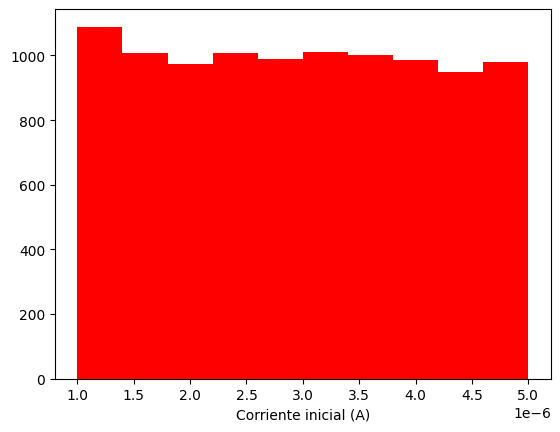

In [30]:
plt.hist(init_arr,color='r')
plt.xlabel('Corriente inicial (A)')
plt.show()


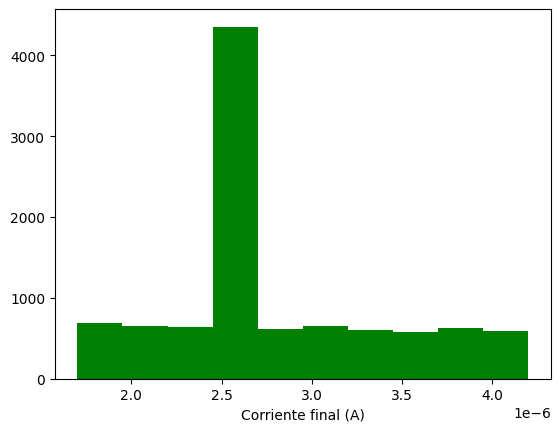

In [31]:
plt.hist(current_arr,color='g')
plt.xlabel('Corriente final (A)')
plt.show()

El CSV muestra los siguientes datos:

In [32]:
pd.options.display.float_format = '{:.9f}'.format
df = pd.read_csv(filename+'.csv')
df.head(10)

,Corriente inicial (A),Corriente final (A),Valor del registro (decimal),Valor del registro (binario)
0,0.000004378,0.000003578,15,0b1111
1,0.000001537,0.000002237,7,0b111
2,0.000004824,0.000004024,15,0b1111
3,0.000001952,0.000002452,5,0b101
4,0.000001944,0.000002544,6,0b110
5,0.000003492,0.000002692,15,0b1111
6,0.000004173,0.000003373,15,0b1111
7,0.000002295,0.000002495,2,0b10
8,0.000001907,0.000002507,6,0b110
9,0.000002852,0.000002452,11,0b1011
